In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

[6]


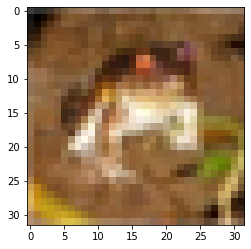

In [7]:
i=0
plt.imshow(X_train[i])
print(y_train[i])

[9]


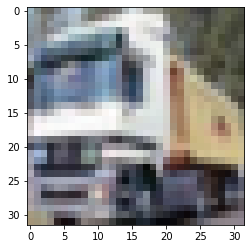

In [8]:
i =1
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


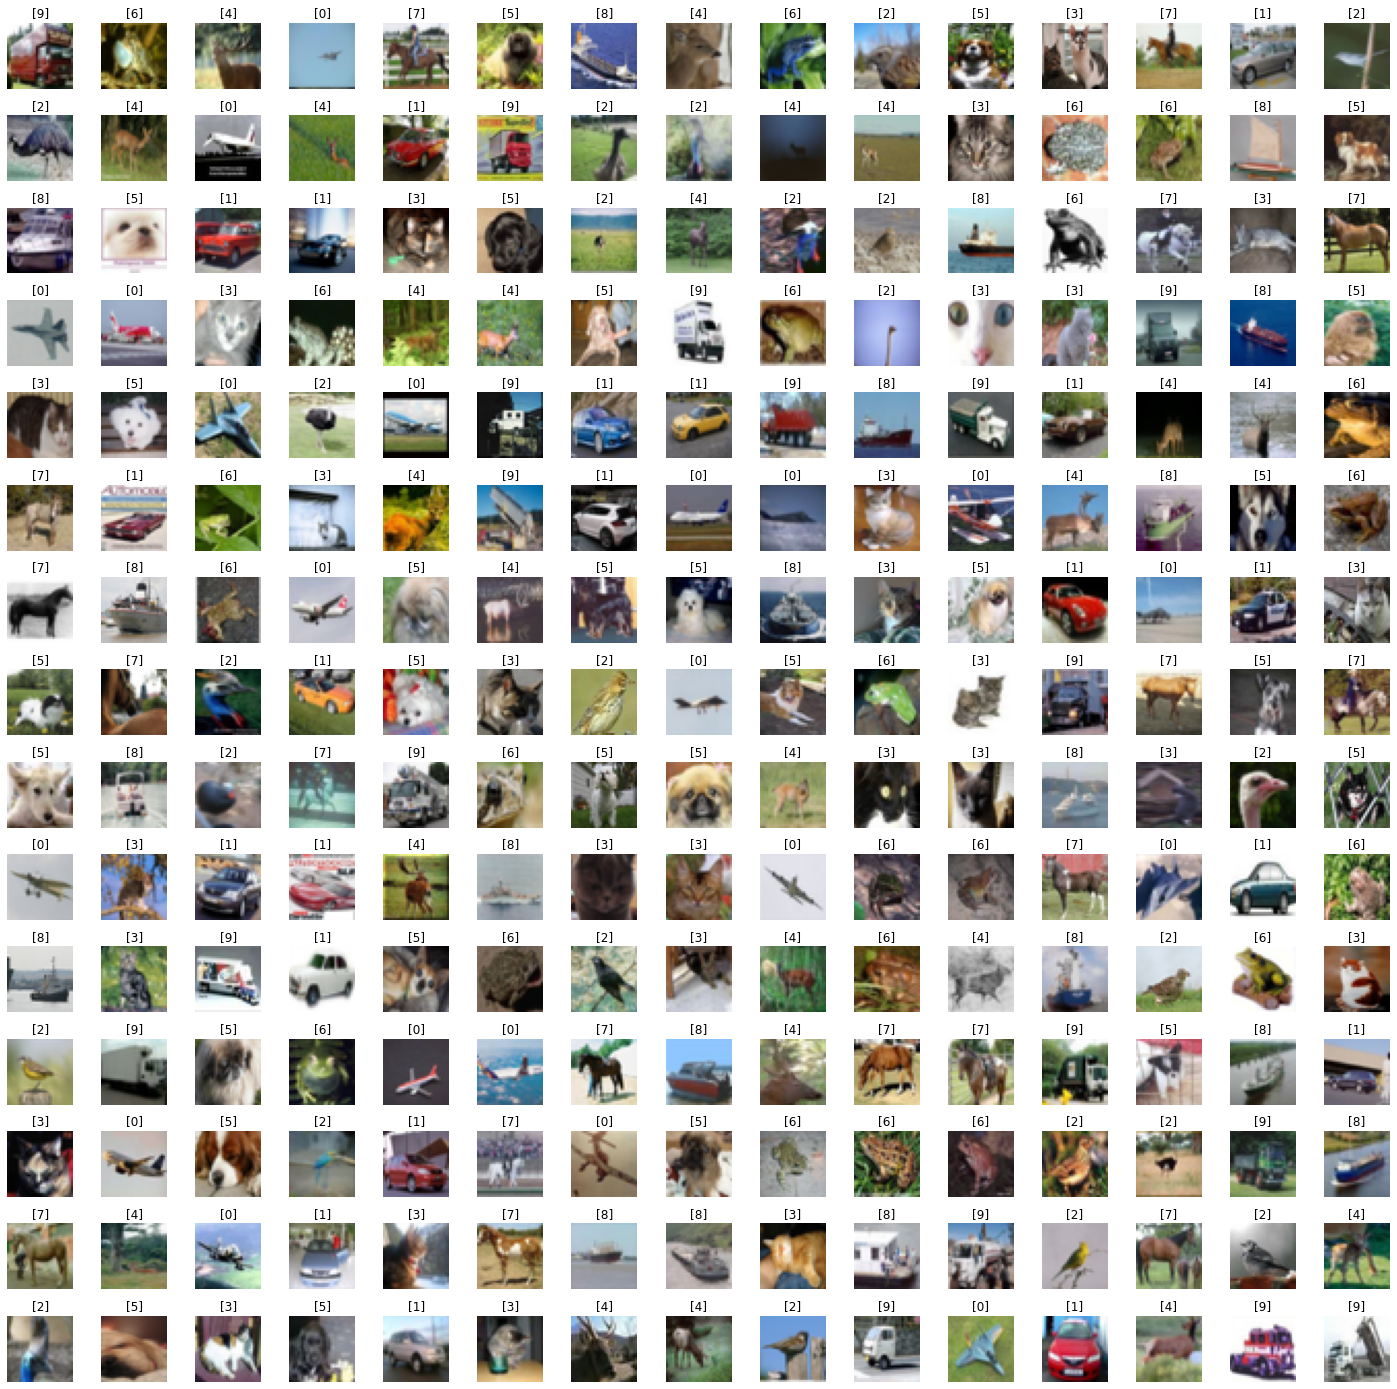

In [9]:
w_grid=15
l_grid=15
fig, axes=plt.subplots(l_grid, w_grid, figsize=(25, 25))
axes = axes.ravel()
n_training=len(X_train)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)  

In [10]:
n_training

50000

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
number_cat=10

In [14]:
import keras
y_train=keras.utils.to_categorical(y_train, number_cat)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test=keras.utils.to_categorical(y_test, number_cat)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [19]:
X_train=X_train/255
X_test=X_test/255

In [20]:
Input_shape= X_train.shape[1:]
Input_shape

(32, 32, 3)

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 1024, activation='relu'))
cnn_model.add(Dense(units = 1024, activation ='relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [23]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 3, shuffle = True)

Epoch 1/3
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5909 - accuracy: 0.4316
Epoch 2/3
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1378 - accuracy: 0.6142
Epoch 3/3
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0169 - accuracy: 0.6558


In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.6109 - accuracy: 0.5278
Test Accuracy: 0.5278000235557556


In [27]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 8, 3, ..., 5, 4, 7])

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test=y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

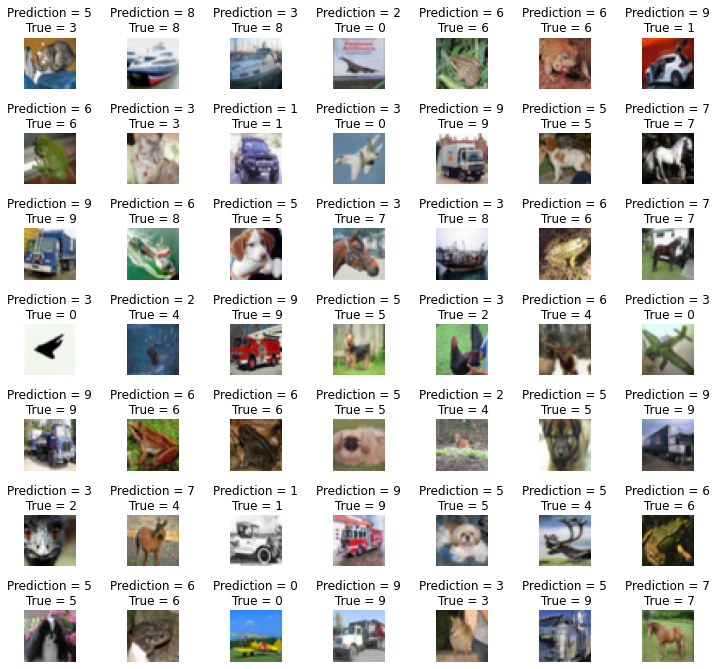

In [31]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

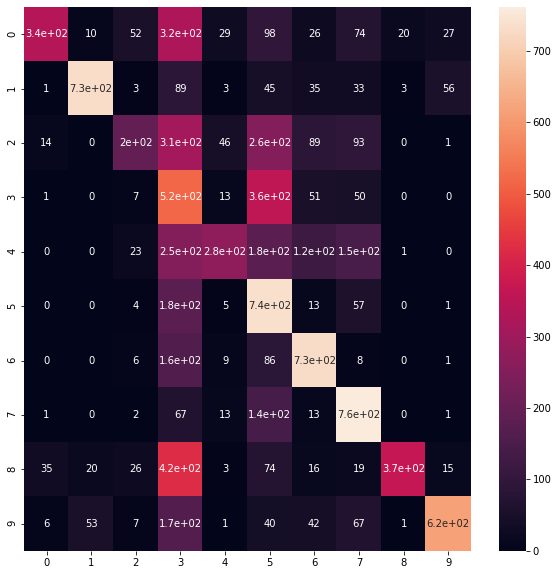

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [33]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path= os.path.join(directory, 'keras_cifar10_trained_models.h5')
cnn_model.save('model_path')  

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_path/assets


In [34]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(
                                    rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True)
dataget_train.fit(X_train)

In [35]:
cnn_model.fit_generator(dataget_train.flow(X_train, y_train, batch_size = 32), epochs = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1563/1563 [==============================] - 29s 18ms/step - loss: 1.7219 - accuracy: 0.3852
Epoch 2/2
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5834 - accuracy: 0.4384


In [36]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

ValueError: ignored

In [37]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)